## Data Preprocessing

## Imports

In [2]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt

from IPython.display import display

In [3]:
pa.options.display.max_rows=300

## Fetching dataset

In [4]:
column_names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income'
]
# dataset
adult = pa.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
    names=column_names
)

# test dataset
adultTest = pa.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',
    names=column_names,
    skiprows=1, # skip first row
)


## Dropping rows with missing values

In [5]:
# replacing the ' ?' with are missing values with pa.NA
adult = adult.replace(' ?', np.NaN)
# then drop rows with pa.NA
adult.dropna(inplace=True)

adultTest = adultTest.replace(' ?', np.NaN)
adultTest.dropna(inplace=True)


In [6]:
adult.shape

(30162, 15)

## Getting the right columns


In [7]:
features = [
    'age',
    'workclass',
    'fnlwgt',
    # 'education', 
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    # 'income'
]

## Label encoding

### Making the replace map

We need to replace the strings with numbers

In [8]:
workclass = [
    'Private',
    'Self-emp-not-inc',
    'Self-emp-inc',
    'Federal-gov',
    'Local-gov',
    'State-gov',
    'Without-pay',
    'Never-worked',
]
#                   ↓ there is a space before the strings
workclassNb = {i: f' {workclass[i]}' for i in range(len(workclass))}

maritalStatus = [
    'Married-civ-spouse',
    'Divorced',
    'Never-married',
    'Separated',
    'Widowed',
    'Married-spouse-absent',
    'Married-AF-spouse',
]
maritalStatusNb = {i: f' {maritalStatus[i]}' for i in range(len(maritalStatus))}


occupation = [
    'Tech-support',
    'Craft-repair',
    'Other-service',
    'Sales',
    'Exec-managerial',
    'Prof-specialty',
    'Handlers-cleaners',
    'Machine-op-inspct',
    'Adm-clerical',
    'Farming-fishing',
    'Transport-moving',
    'Priv-house-serv',
    'Protective-serv',
    'Armed-Forces',
]
occupationNb = {i: f' {occupation[i]}' for i in range(len(occupation))}


relationship = [
    'Wife',
    'Own-child',
    'Husband',
    'Not-in-family',
    'Other-relative',
    'Unmarried',
]

relationshipNb = {i: f' {relationship[i]}' for i in range(len(relationship))}


race = ['White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black']
raceNb = {i: f' {race[i]}' for i in range(len(race))}


sex = ['Female', 'Male']
sexNb = {i: f' {sex[i]}' for i in range(len(sex))}

nativeCountry = [
    'United-States',
    'Cambodia',
    'England',
    'Puerto-Rico',
    'Canada',
    'Germany',
    'Outlying-US(Guam-USVI-etc)',
    'India',
    'Japan',
    'Greece',
    'South',
    'China',
    'Cuba',
    'Iran',
    'Honduras',
    'Philippines',
    'Italy',
    'Poland',
    'Jamaica',
    'Vietnam',
    'Mexico',
    'Portugal',
    'Ireland',
    'France',
    'Dominican-Republic',
    'Laos',
    'Ecuador',
    'Taiwan',
    'Haiti',
    'Columbia',
    'Hungary',
    'Guatemala',
    'Nicaragua',
    'Scotland',
    'Thailand',
    'Yugoslavia',
    'El-Salvador',
    'Trinadad&Tobago',
    'Peru',
    'Hong',
    'Holand-Netherlands',
]
nativeCountryNb = {i: f' {nativeCountry[i]}' for i in range(len(nativeCountry))}

income = ['<=50K', '>50K']
invertedIncomeReplMap = {i: f' {income[i]}' for i in range(len(income))}
incomeReplMap = {v: k for k, v in invertedIncomeReplMap.items()}

# the test data has a dot after the income
incomeD = ['<=50K.', '>50K.']
invertedIncomeReplMapD = {i: f' {incomeD[i]}' for i in range(len(incomeD))}
incomeReplMapD = {v: k for k, v in invertedIncomeReplMapD.items()}

cols = [
    'workclass',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
]
colsReplMap = [
    workclassNb,
    maritalStatusNb,
    occupationNb,
    relationshipNb,
    raceNb,
    sexNb,
    nativeCountryNb,
]

invertedReplaceMap = {cols[i]: colsReplMap[i] for i in range(len(cols))}
# invertedReplaceMap

# invert the map
replaceMap = {i[0]: {v: k for k, v in i[1].items()} for i in invertedReplaceMap.items()}

# replaceMap
# incomeReplMap


### Replace the strings with numbers

In [9]:
incomeReplMap

{' <=50K': 0, ' >50K': 1}

In [10]:
adult = adult.replace(replaceMap)  # inplace=True ne fonctionne pas
adult = adult.replace(incomeReplMap)


adultTest = adultTest.replace(replaceMap)  # inplace=True ne fonctionne pas
adultTest = adultTest.replace(incomeReplMapD)

# type(y_test)
# [i for i in X_train.columns]
# X_train.values[14]
# X_train.drop([])
# X_train


In [11]:
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,Bachelors,13,2,8,3,0,1,2174,0,40,0,0
1,50,1,83311,Bachelors,13,0,4,2,0,1,0,0,13,0,0
2,38,0,215646,HS-grad,9,1,6,3,0,1,0,0,40,0,0
3,53,0,234721,11th,7,0,6,2,4,1,0,0,40,0,0
4,28,0,338409,Bachelors,13,0,5,0,4,0,0,0,40,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0,257302,Assoc-acdm,12,0,0,0,0,0,0,0,38,0,0
32557,40,0,154374,HS-grad,9,0,7,2,0,1,0,0,40,0,1
32558,58,0,151910,HS-grad,9,4,8,5,0,0,0,0,40,0,0
32559,22,0,201490,HS-grad,9,2,8,1,0,1,0,0,20,0,0


In [12]:
# no need to split the data as the test data is already provided
X_train = adult[features]
y_train = adult.income

X_test = adultTest[features]
y_test = adultTest.income

In [13]:
X_train.shape, X_test.shape
#test_size, train_size

((30162, 13), (15060, 13))

In [14]:
# y_test

In [15]:
# y_train

In [16]:
X_train.to_csv('out.csv')
# X_train.head(20)

In [17]:
X_train.shape, y_train.shape, 

((30162, 13), (30162,))

In [18]:
y_train.values

array([0, 0, 0, ..., 0, 0, 1])

In [19]:
# X_train.info()
# print('---------')
# y_train.describe()
# print('---------')

# X_test.info()
# print('---------')
# y_test.describe()

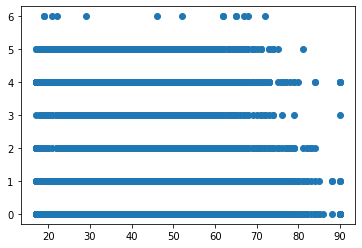

In [20]:
plt.scatter(adult.values[:,0], adult.values[:,1])

In [21]:
adult.income.describe()

count    30162.000000
mean         0.248922
std          0.432396
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: income, dtype: float64

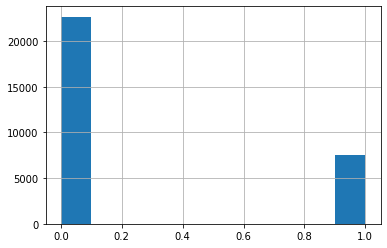

In [22]:
adult.income.hist()

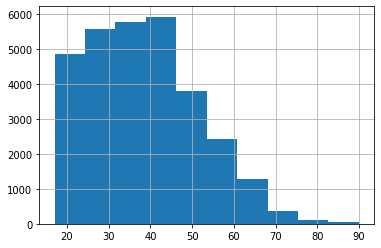

In [23]:
adult.age.hist()



## 1. Hierarchical Clustering

In [ ]:
#We keep 2 interesting features (columns)
data = adult[['age','income']]
print(data.shape) #32561 lines, 2 columns
data.head()

(30162, 2)


,age,income
0,39,0
1,50,0
2,38,0
3,53,0
4,28,0


Dendogram:

The dendogram will help us find the optimal numbers of clusters. We look for the largest vertical distance without crossing any horizontal lines. In this graph, we will see that the vertical line that we are looking for, is the blue line on the very left of the graph.

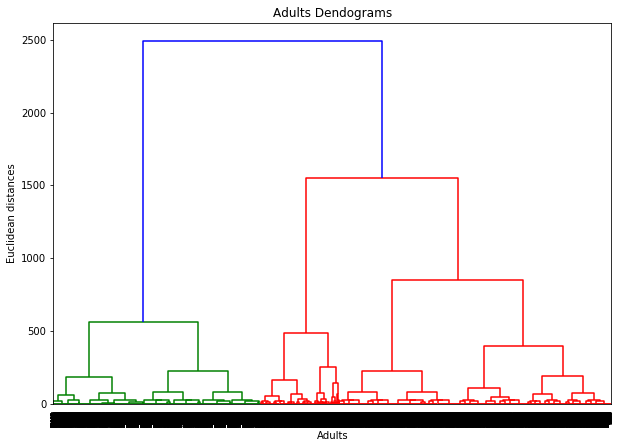

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage 
plt.figure(figsize=(10, 7))
plt.title("Adults Dendograms")
plt.xlabel('Adults')
plt.ylabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(data, method='ward'))

We now have to draw a horizontal line on this longest line to find how many clusters we will get. The number vertical lines that cross this new line will give us the number of clusters.

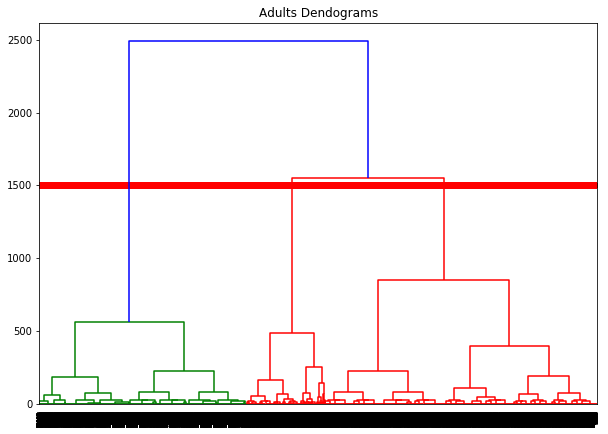

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Adults Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))
hline = np.array([[x,1500] for x in range(30,300000)])
plt.scatter(hline[:,0], hline[:,1], color='red')

Agglomerative Clustering:

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage='ward')
cluster.fit_predict(data)

array([3, 1, 3, ..., 2, 0, 1])

In [ ]:
print(cluster.labels_)

[3 1 3 ... 2 0 1]


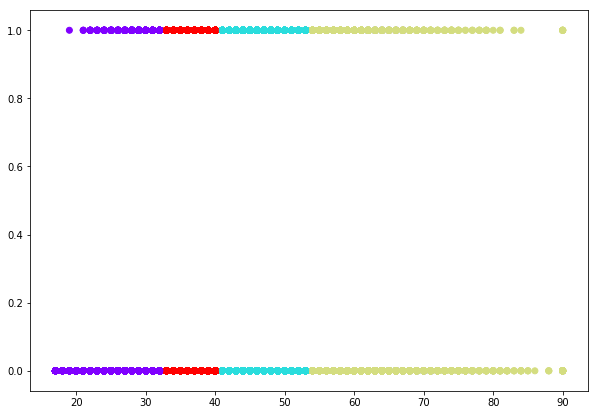

In [ ]:
plt.figure(figsize=(10,7))
data=data.values
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

## 2. Decision Tree

In [ ]:
import numpy as np
import pandas as pa
from matplotlib import pyplot as plt
# additional modules for data visualisation:
import seaborn as sns
sns.set()

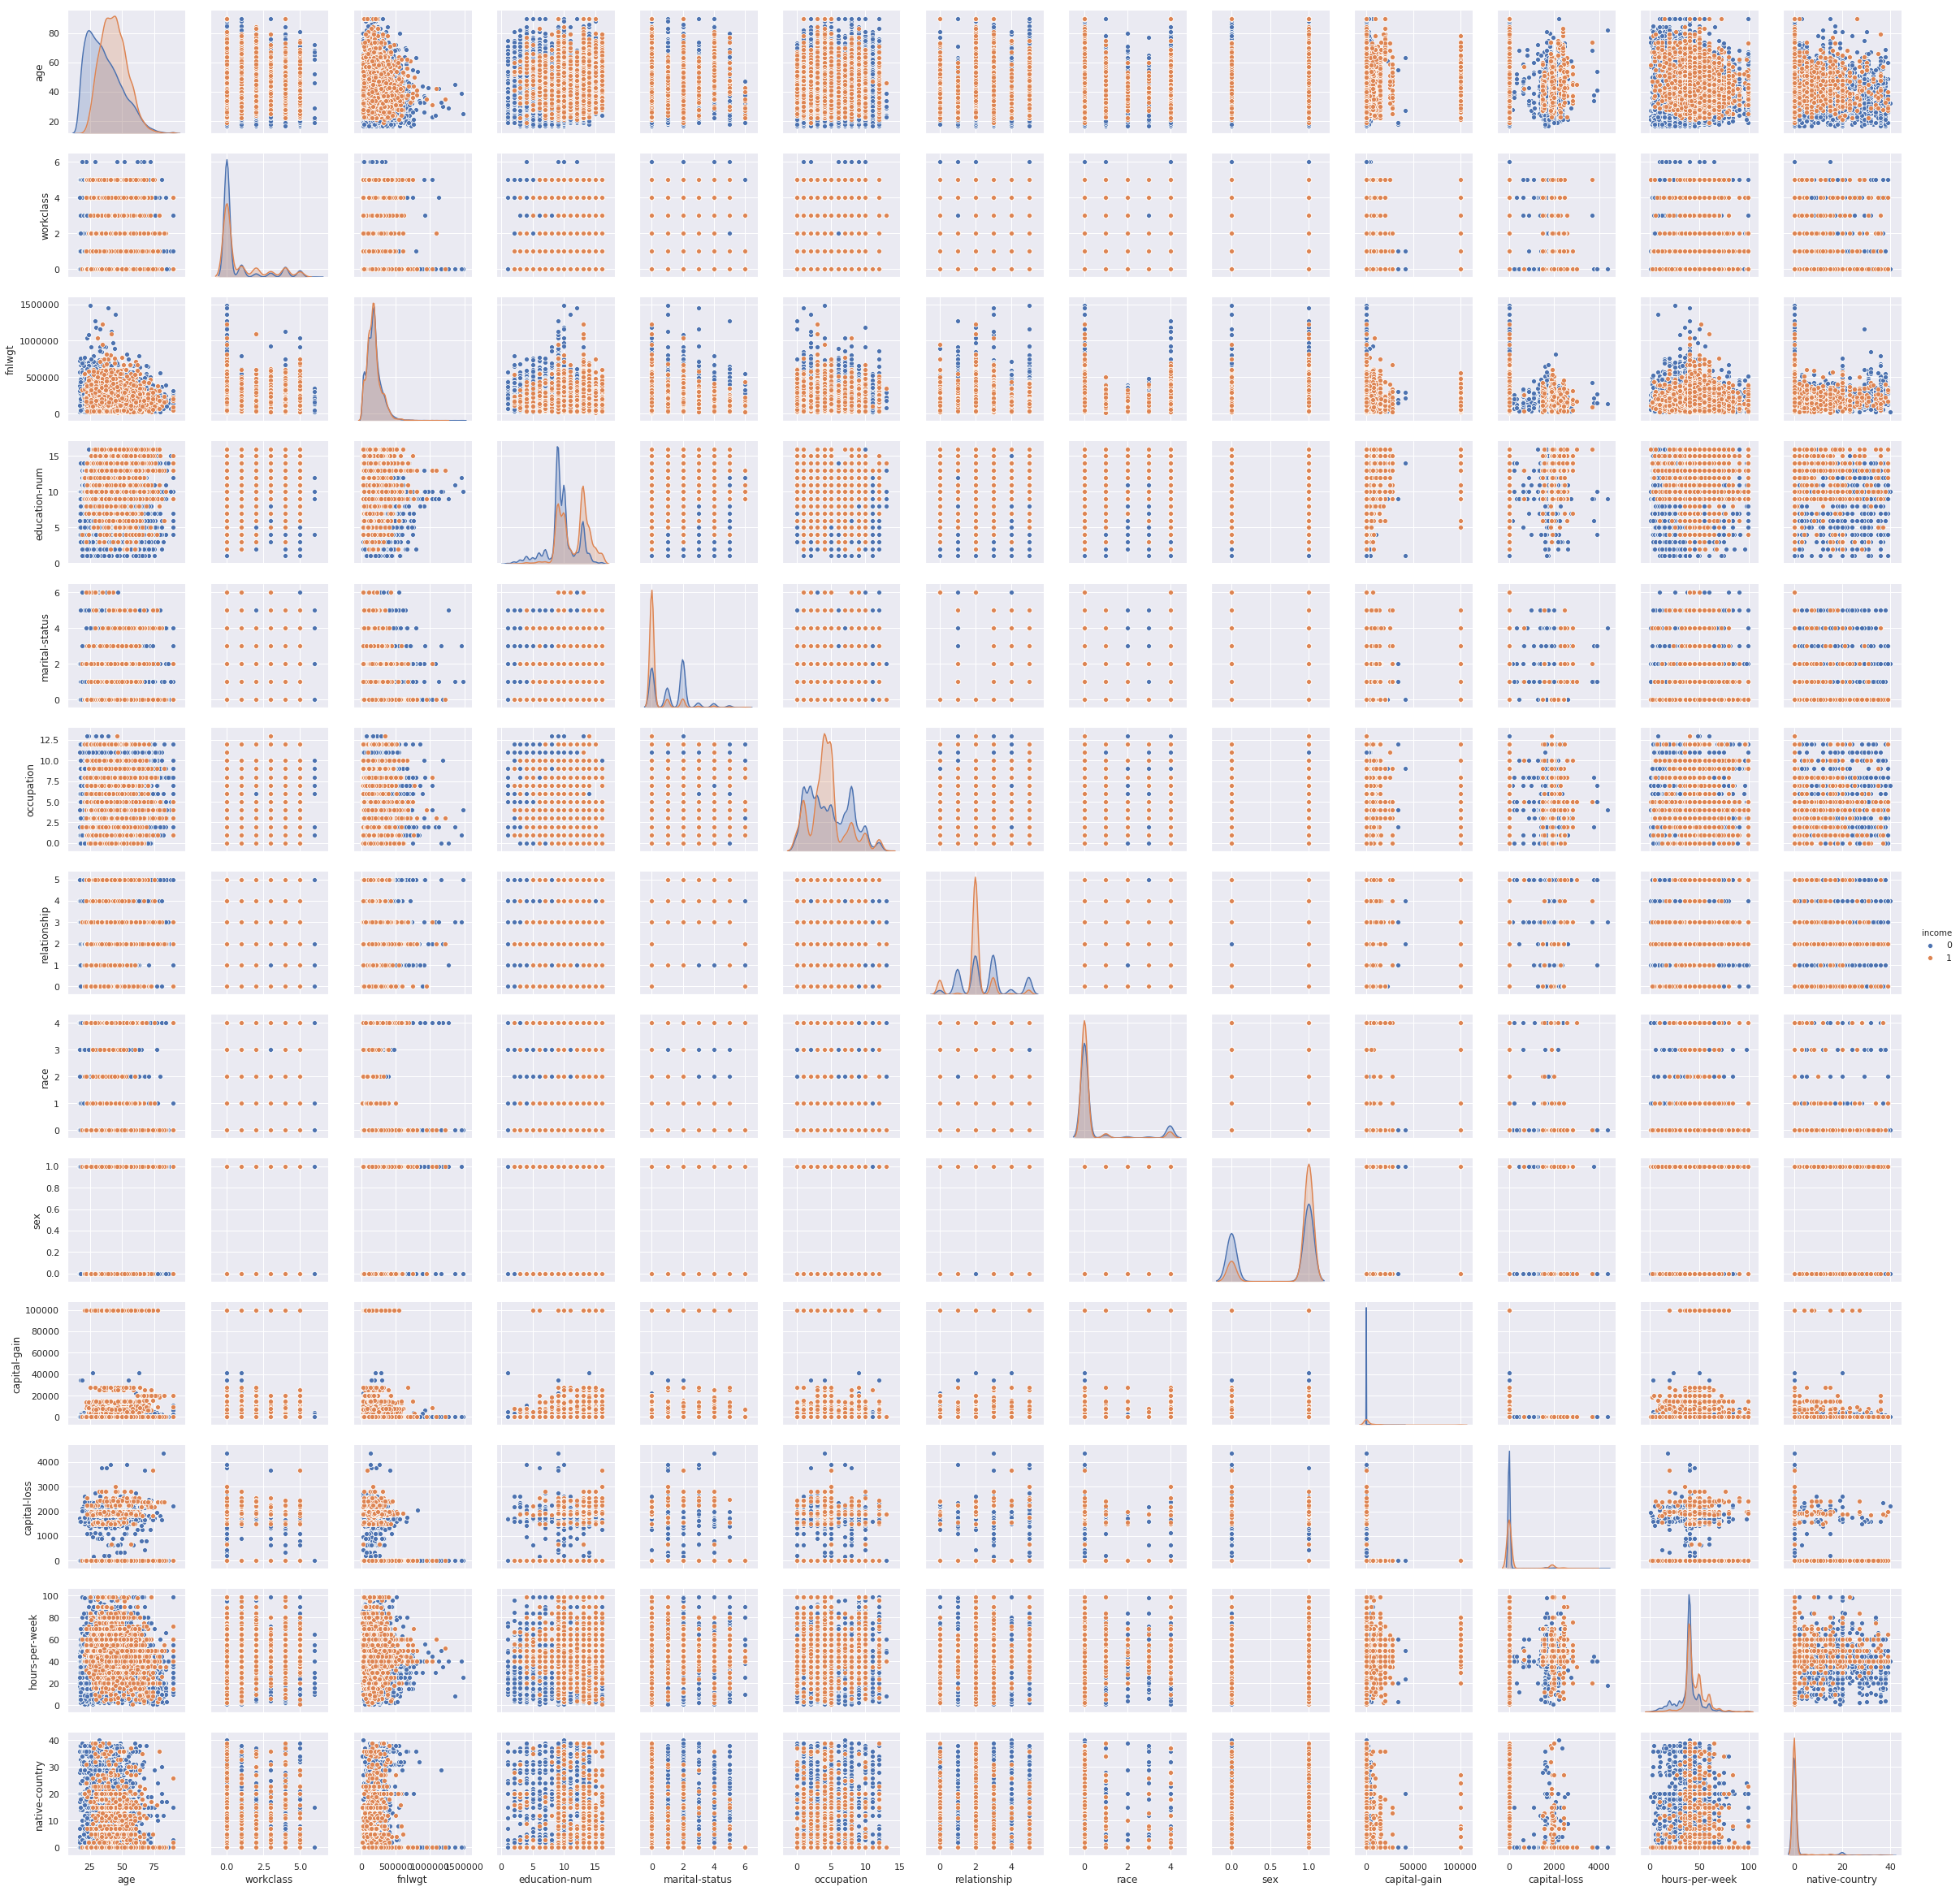

In [ ]:
#checks relationship for each column to other columns
sns.pairplot(adult, hue='income', vars=features).savefig('snsplot.png')

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
# feature_cols =['age', 'fnlwgt', 'education-num', 'capital-gain','capital-loss', 'hours-per-week']
feature_cols =['capital-gain','capital-loss']
#we will not consider entire the dataset, we extract the attributes that we need
# all_inputs = adult[['capital-gain','capital-loss']].values
# all_classes = adult[['income']].values
#X = adult[column_names]
#y = adult[column_names[1]] #.target .label didn't work

train_inputs = adult[['capital-gain','capital-loss']].values
test_inputs = adultTest[['capital-gain','capital-loss']].values

train_classes = adult[['income']].values
test_classes = adultTest[['income']].values

In [42]:
import warnings
warnings.filterwarnings("ignore")
from sklearn import tree
from sklearn import metrics
#let's train our supervised learning model using Decision Tree classifier
dt = tree.DecisionTreeClassifier()
dt.fit(train_inputs, train_classes)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
#now let's predict the values for the test subset
y_pred = dt.predict(test_inputs)
print(y_pred.shape)
print(test_classes.shape)

(15060,)
(15060, 1)


In [44]:
#let's compute the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_classes, y_pred)
print(cm)

[[11327    33]
 [ 2560  1140]]


In [45]:
#compute the accuracy
scores = metrics.accuracy_score(test_classes, y_pred)
print('Accuracy: ','{:2.2%}'.format(scores))

Accuracy:  82.78%


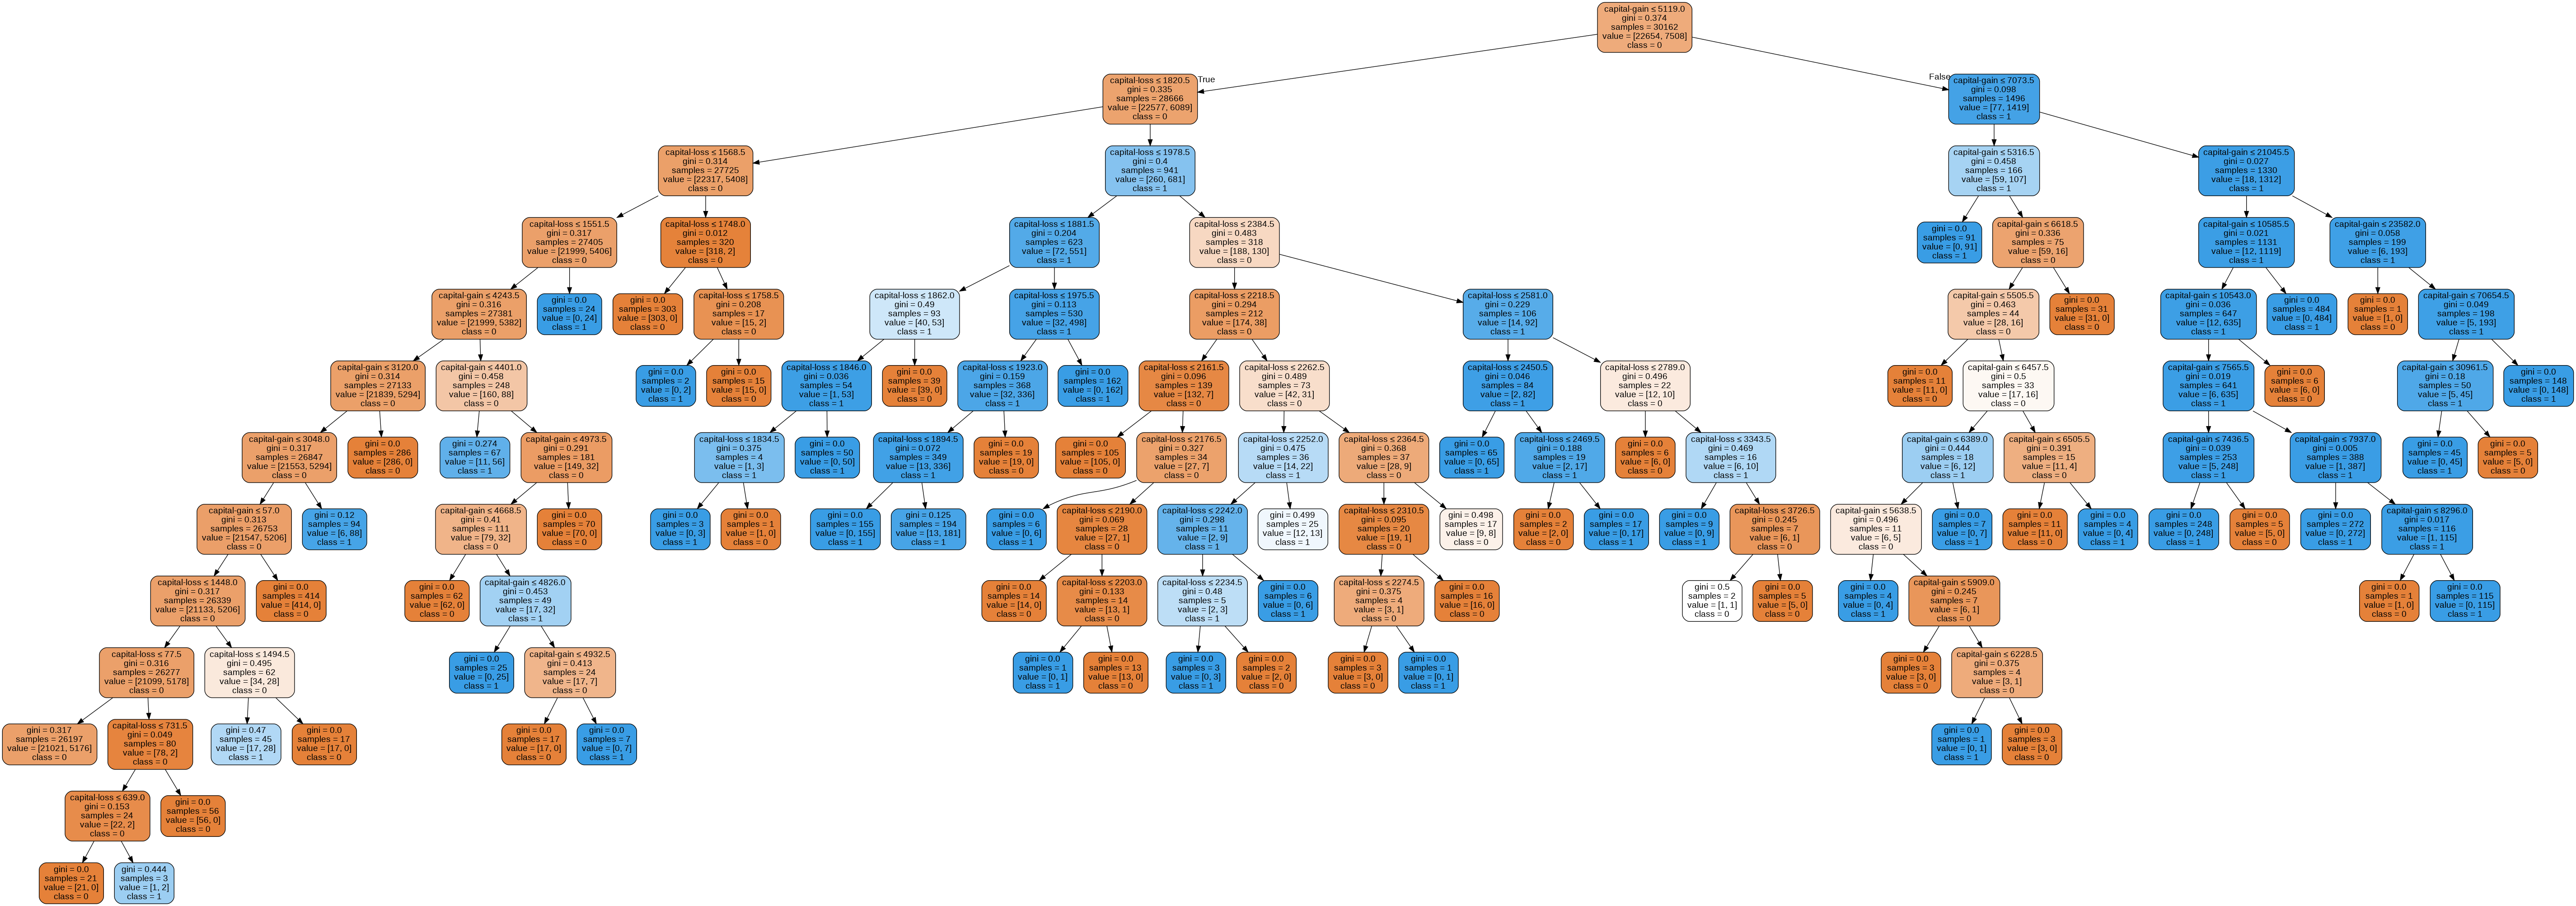

In [46]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('adult.png')
Image(graph.create_png())

The resultant tree is unpruned which is unexplainable and not easy to understand. Now let's optimize our tree by fixing a maximum depth as 3. Even though the graph is more visible the percentage went down by approximately 1%

In [60]:
import warnings
warnings.filterwarnings("ignore")
from sklearn import tree
from sklearn import metrics
# Create Decision Tree classifer object with maxmimum depth 3
dt = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
dt= dt.fit(train_inputs, train_classes)
#Predict the response for test dataset
y_pred = dt.predict(test_inputs)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_classes, y_pred))

Accuracy: 0.8106241699867198


The classifier is correct 81%.

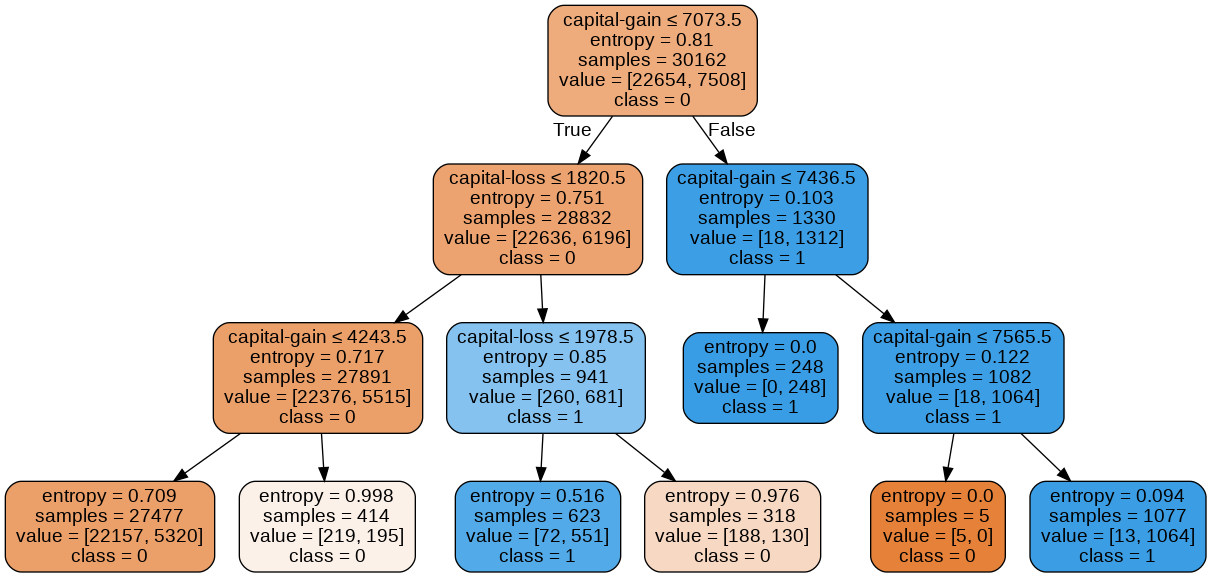

In [61]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('adult.png')
Image(graph.create_png())

This graph, the decision tree model enables us to classify the data and predict if a person has made a capital gain or not. This model is very suitable for our dataset since it simplifies interpretation and visualisation of our dataset.

## 3. Artificial Neural Networks

### Description

```
| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over 50K
| a year.
|
| First cited in:
| @inproceedings{kohavi-nbtree,
|    author={Ron Kohavi},
|    title={Scaling Up the Accuracy of Naive-Bayes Classifiers: a
|           Decision-Tree Hybrid},
|    booktitle={Proceedings of the Second International Conference on
|               Knowledge Discovery and Data Mining},
|    year = 1996,
|    pages={to appear}}
|
| Error Accuracy reported as follows, after removal of unknowns from
|    train/test sets):
|    C4.5       : 84.46+-0.30
|    Naive-Bayes: 83.88+-0.30
|    NBTree     : 85.90+-0.28
|
|
| Following algorithms were later run with the following error rates,
|    all after removal of unknowns and using the original train/test split.
|    All these numbers are straight runs using MLC++ with default values.
|
|    Algorithm               Error
| -- ----------------        -----
| 1  C4.5                    15.54
| 2  C4.5-auto               14.46
| 3  C4.5 rules              14.94
| 4  Voted ID3 (0.6)         15.64
| 5  Voted ID3 (0.8)         16.47
| 6  T2                      16.84
| 7  1R                      19.54
| 8  NBTree                  14.10
| 9  CN2                     16.00
| 10 HOODG                   14.82
| 11 FSS Naive Bayes         14.05
| 12 IDTM (Decision table)   14.46
| 13 Naive-Bayes             16.12
| 14 Nearest-neighbor (1)    21.42
| 15 Nearest-neighbor (3)    20.35
| 16 OC1                     15.04
| 17 Pebls                   Crashed.  Unknown why (bounds WERE increased)
|
| Conversion of original data as follows:
| 1. Discretized agrossincome into two ranges with threshold 50,000.
| 2. Convert U.S. to US to avoid periods.
| 3. Convert Unknown to "?"
| 4. Run MLC++ GenCVFiles to generate data,test.
|
| Description of fnlwgt (final weight)
|
| The weights on the CPS files are controlled to independent estimates of the
| civilian noninstitutional population of the US.  These are prepared monthly
| for us by Population Division here at the Census Bureau.  We use 3 sets of
| controls.
|  These are:
|          1.  A single cell estimate of the population 16+ for each state.
|          2.  Controls for Hispanic Origin by age and sex.
|          3.  Controls by Race, age and sex.
|
| We use all three sets of controls in our weighting program and "rake" through
| them 6 times so that by the end we come back to all the controls we used.
|
| The term estimate refers to population totals derived from CPS by creating
| "weighted tallies" of any specified socio-economic characteristics of the
| population.
|
| People with similar demographic characteristics should have
| similar weights.  There is one important caveat to remember
| about this statement.  That is that since the CPS sample is
| actually a collection of 51 state samples, each with its own
| probability of selection, the statement only applies within
| state.


>50K, <=50K.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
```



### Neural network

#### Imports

In [24]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.optimizers import Adam

#### ANN

In [26]:
X_train.shape

(30162, 13)

In [28]:
outdim = 7
#outdim = number of nodes in the Input Layer
indim = X_train.shape[1] #13
indim

13

In [30]:
def neural_network():  
    model = Sequential()
    # first layer
    print('here1')
    model.add(
        Dense(
            outdim,
            input_dim = indim, # number of variables per row
            kernel_initializer='normal',
            activation='relu'
        )
    )
    print('here2')
    # second layer
    model.add(
        Dense(
            indim,
            kernel_initializer='normal',
            activation='softmax'
        )
    )
    print('here3')

    # output layer
    model.add(Dense(1, kernel_initializer = 'uniform', activation='sigmoid'))
    
    # Compiling the ANN
    model.compile(
        loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']
    )
    return model


#### Training the model

In [31]:
model = neural_network()
model.summary()

here1
here2
here3
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 98        
_________________________________________________________________
dense_1 (Dense)              (None, 13)                104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 14        
Total params: 216
Trainable params: 216
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)

Epoch 1/50
472/472 [==============================] - 2s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7530 - val_loss: 0.0000e+00 - val_accuracy: 0.7543
Epoch 2/50
472/472 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7521 - val_loss: 0.0000e+00 - val_accuracy: 0.7543
Epoch 3/50
472/472 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7562 - val_loss: 0.0000e+00 - val_accuracy: 0.7543
Epoch 4/50
472/472 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7494 - val_loss: 0.0000e+00 - val_accuracy: 0.7543
Epoch 5/50
472/472 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7488 - val_loss: 0.0000e+00 - val_accuracy: 0.7543
Epoch 6/50
472/472 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7553 - val_loss: 0.0000e+00 - val_accuracy: 0.7543
Epoch 7/50
472/472 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7

In [33]:
y_pred = model.predict(X_test)
y_pred

array([[1.8468481e-21],
       [1.8468481e-21],
       [1.8468481e-21],
       ...,
       [1.8468481e-21],
       [1.8468481e-21],
       [1.8468481e-21]], dtype=float32)

In [34]:
accuracy = model.evaluate(X_train, y_train)

943/943 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.7511


In [35]:
accuracy

[0.0, 0.7510775327682495]

In [36]:
y_pred = (y_pred > 0.5)

In [37]:
#if y_pred is larger than 0.5 it returns true(1) else false(2)
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11360     0]
 [ 3700     0]]


In [39]:
scores = model.evaluate(X_test, y_test)
print("Neural network accuracy: %.2f%%" % (scores[1]*100))

471/471 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.7543
Neural network accuracy: 75.43%
